In [1]:
import numpy as np
import pandas as pd

url = 'http://apmonitor.com/pds/uploads/Main/manufacturing.txt'
data = pd.read_csv(url)

# 'material' (1 is abs, 0 is pla) with numpy.where
data['material'] = np.where(data['material']=='abs',1,0)

# 'infill pattern' (1 is 'grid', 0 is 'honeycomb') with list comprehension
data.infill_pattern = [1 if ip=="grid" else 0 for ip in data.infill_pattern]

In [2]:
# move label to the last column
d1 = data.pop('material')
data['material'] = d1
data.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,fan_speed,roughness,tension_strength,elongation,material
0,0.02,8.0,90,1,220,60,40,0,25,18,1.2,1
1,0.02,7.0,90,0,225,65,40,25,32,16,1.4,1
2,0.02,1.0,80,1,230,70,40,50,40,8,0.8,1
3,0.02,4.0,70,0,240,75,40,75,68,10,0.5,1
4,0.02,6.0,90,1,250,80,40,100,92,5,0.7,1


## Part 1: Data Visualization and Cleansing

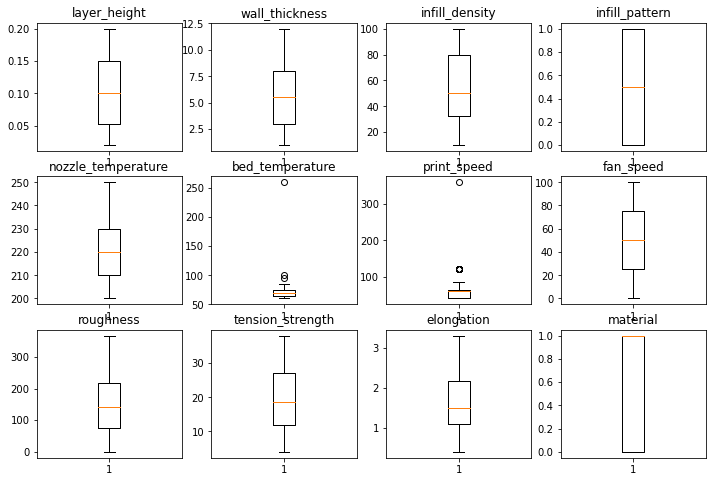

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,8))

for i,c in enumerate(data.columns):
    if i<=11:
        plt.subplot(3,4,i+1)
        plt.title(c)
        plt.boxplot(data[c])
plt.show()

## Remove One Outlier

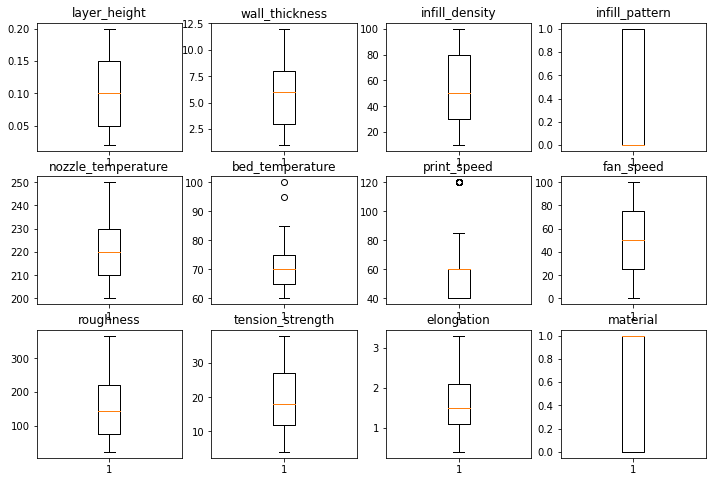

In [4]:
b = data[data['bed_temperature']>150]
data = data[data['bed_temperature']<150]

plt.figure(figsize=(12,8))

for i,c in enumerate(data.columns):
    if i<=11:
        plt.subplot(3,4,i+1)
        plt.title(c)
        plt.boxplot(data[c])
plt.show()

In [5]:
b

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,fan_speed,roughness,tension_strength,elongation,material
63,0.15,3.0,90,1,215,260,360,0,-1,33,2.8,0


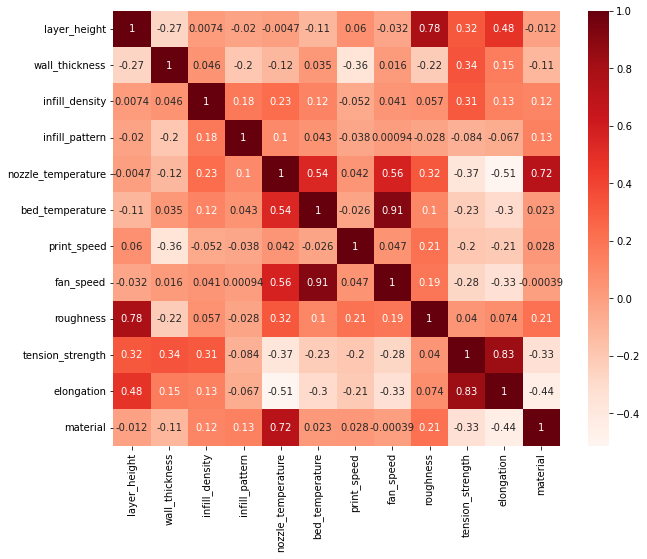

In [6]:
# correlation matrix
import seaborn as sns
from matplotlib import cm
plt.figure(figsize=(10,8))
cor = data.corr()
sns.heatmap(cor, annot=True,cmap=plt.cm.Reds)
plt.show()

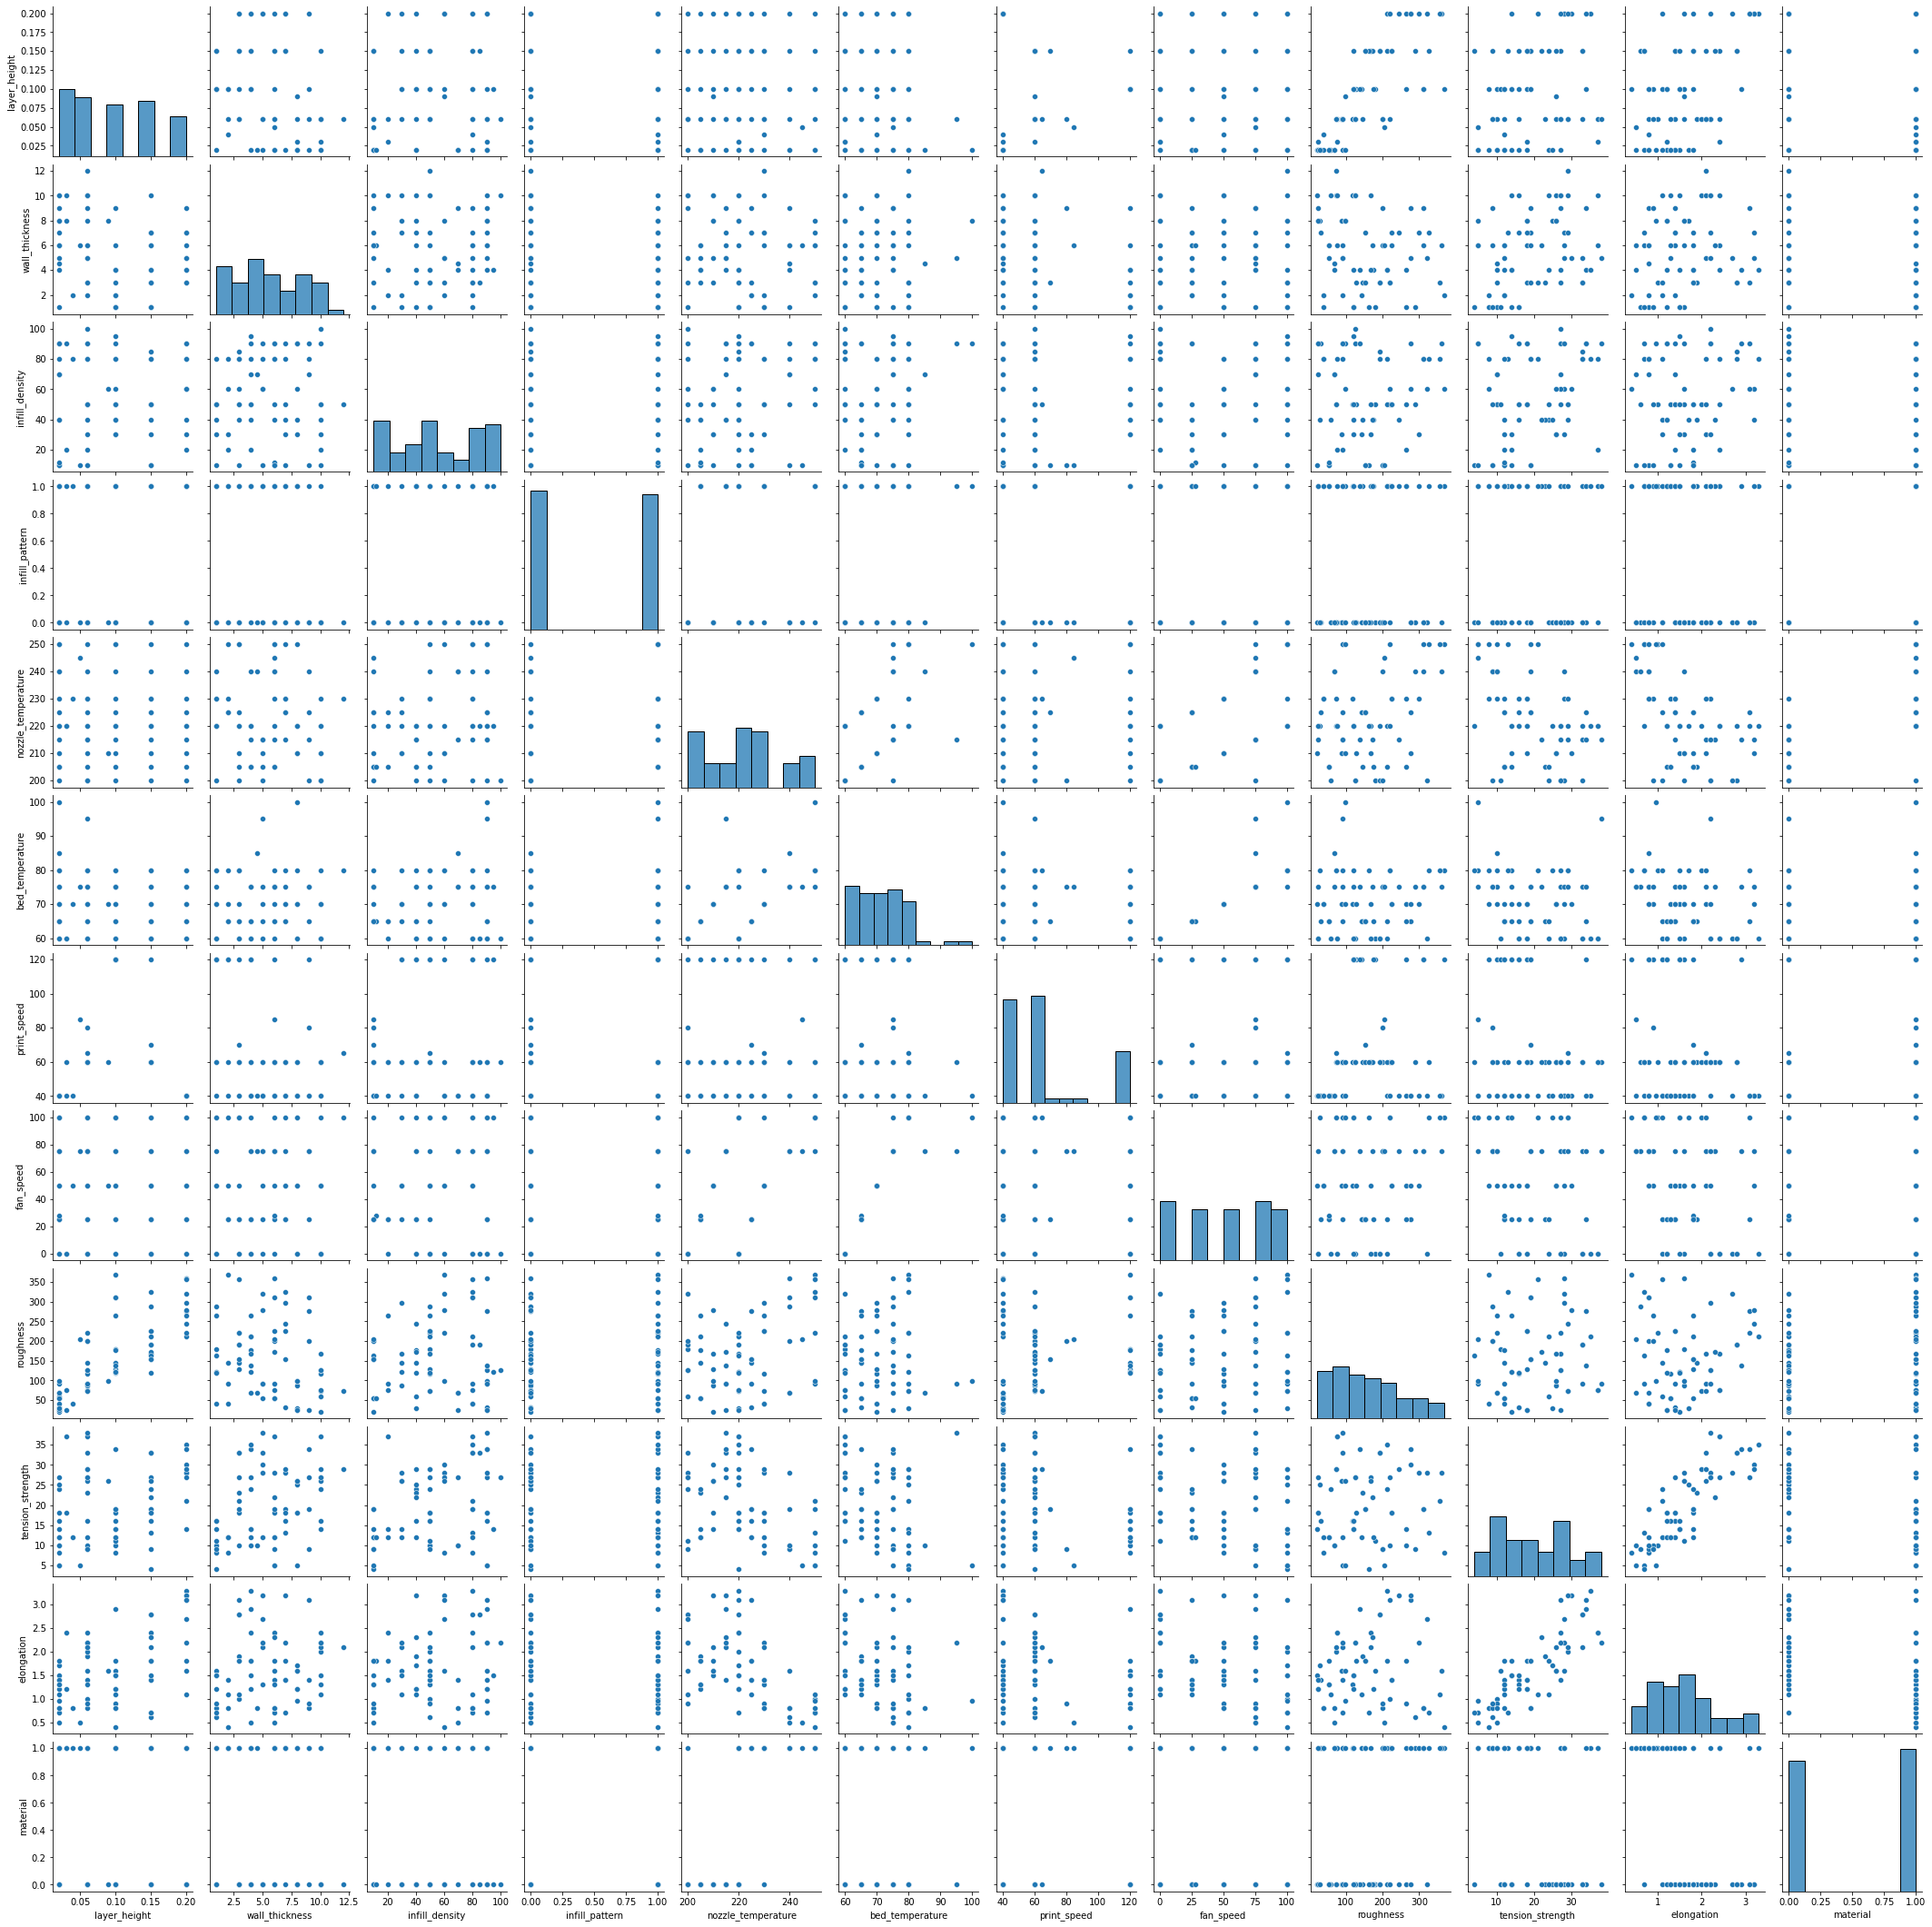

In [7]:
# pairplot
sns.pairplot(data)

Nozzle Temperature is the most correlated to material. Elongation is the most correlated to tension strength

## Part 2: Classification

In [8]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(data, test_size=0.2, shuffle=True)

x_train = train[train.columns[0:-1]]
z_train = train[train.columns[-1]]
x_test = test[test.columns[0:-1]]
z_test = test[test.columns[-1]]

### ADABoost

accuracy = 0.78571


<AxesSubplot:>

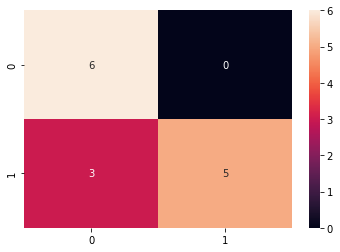

In [9]:
from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier()
classifier.fit(x_train,z_train)
zP = classifier.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(z_test,zP)
accuracy = np.trace(cm)/len(z_test)
print(f'accuracy = {np.round(accuracy,5)}')
sns.heatmap(cm,annot=True)

### Logistic Regression

accuracy = 0.64286


<AxesSubplot:>

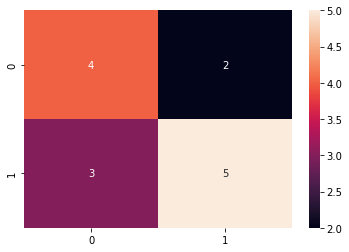

In [10]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs')
classifier.fit(x_train,z_train)
zP = classifier.predict(x_test)
cm = confusion_matrix(z_test,zP)
accuracy = np.trace(cm)/len(z_test)
print(f'accuracy = {np.round(accuracy,5)}')
sns.heatmap(cm,annot=True)

### Naive Bayes

accuracy = 0.64286


<AxesSubplot:>

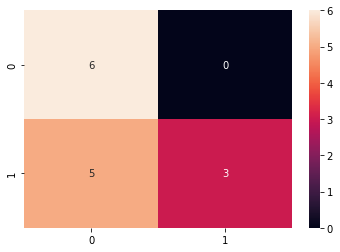

In [11]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train,z_train)
zP = classifier.predict(x_test)
cm = confusion_matrix(z_test,zP)
accuracy = np.trace(cm)/len(z_test)
print(f'accuracy = {np.round(accuracy,5)}')
sns.heatmap(cm,annot=True)

### Stochastic Gradient Descent

accuracy = 0.35714


<AxesSubplot:>

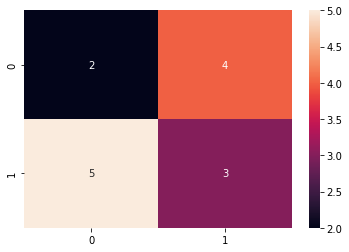

In [12]:
from sklearn.linear_model import SGDClassifier
classifier = SGDClassifier(loss='modified_huber',shuffle=True,random_state=101)
classifier.fit(x_train,z_train)
zP = classifier.predict(x_test)
cm = confusion_matrix(z_test,zP)
accuracy = np.trace(cm)/len(z_test)
print(f'accuracy = {np.round(accuracy,5)}')
sns.heatmap(cm,annot=True)

### K-Nearest Neighbors

accuracy = 0.35714


<AxesSubplot:>

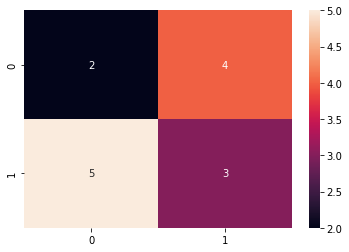

In [13]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train,z_train)
zP = classifier.predict(x_test)
cm = confusion_matrix(z_test,zP)
accuracy = np.trace(cm)/len(z_test)
print(f'accuracy = {np.round(accuracy,5)}')
sns.heatmap(cm,annot=True)

### Decision Tree

accuracy = 0.71429


<AxesSubplot:>

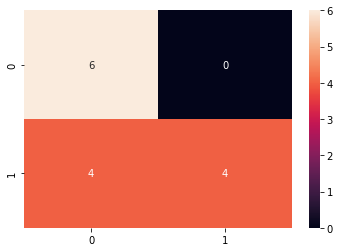

In [14]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth=10,random_state=101,\
                               max_features=None,min_samples_leaf=5)
classifier.fit(x_train,z_train)
zP = classifier.predict(x_test)
cm = confusion_matrix(z_test,zP)
accuracy = np.trace(cm)/len(z_test)
print(f'accuracy = {np.round(accuracy,5)}')
sns.heatmap(cm,annot=True)

### Random Forest

accuracy = 0.78571


<AxesSubplot:>

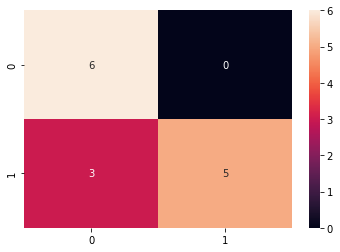

In [15]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=70,oob_score=True,n_jobs=1,\
                  random_state=101,max_features=None,min_samples_leaf=3)
classifier.fit(x_train,z_train)
zP = classifier.predict(x_test)
cm = confusion_matrix(z_test,zP)
accuracy = np.trace(cm)/len(z_test)
print(f'accuracy = {np.round(accuracy,5)}')
sns.heatmap(cm,annot=True)

### Support Vector Classifier

accuracy = 0.35714


<AxesSubplot:>

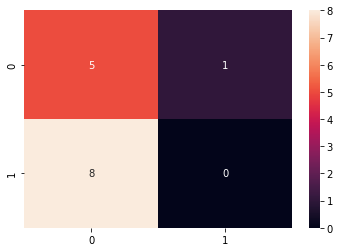

In [16]:
from sklearn.svm import SVC
classifier = SVC(gamma='scale', C=1.0, random_state=101)
classifier.fit(x_train,z_train)
zP = classifier.predict(x_test)
cm = confusion_matrix(z_test,zP)
accuracy = np.trace(cm)/len(z_test)
print(f'accuracy = {np.round(accuracy,5)}')
sns.heatmap(cm,annot=True)

### Deep Learning Neural Network

accuracy = 1.0


<AxesSubplot:>

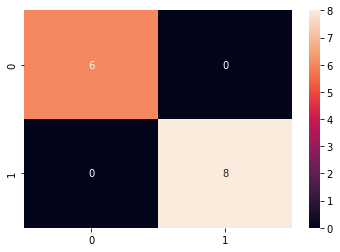

In [17]:
from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier(solver='lbfgs',alpha=1e-5,max_iter=200,\
                    activation='relu',hidden_layer_sizes=(10,30,10),\
                    random_state=1, shuffle=True)
classifier.fit(x_train,z_train)
zP = classifier.predict(x_test)
cm = confusion_matrix(z_test,zP)
accuracy = np.trace(cm)/len(z_test)
print(f'accuracy = {np.round(accuracy,5)}')
sns.heatmap(cm,annot=True)

## Part 3: Regression

### Setting up the Regression

In [29]:
ftrain = ['layer_height','wall_thickness','infill_density','infill_pattern','nozzle_temperature','bed_temperature','print_speed','fan_speed', 'roughness', 'tension_strength','elongation', 'material']

hls = (3,)
a = 'tanh'
s = 'lbfgs'
mi = 5000

df = data

def Definedata():
    data2 = df[ftrain]
    X = data2.drop(columns=['tension_strength']).values
    y = data2['tension_strength'].values
    return X, y

def Models(models):
    
    model = models
    
    if model == MLPRegressor(hidden_layer_sizes = hls, activation = a, solver = s, max_iter = mi):
        X, y = Definedata()
        X = X.reshape(-1, 1)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 25)
        y_pred = model.predict(X_test)
        y_total = model.predict(X)
        
    else:
        X, y = Definedata()
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 25)
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        y_total = model.predict(X)
    
    print("\t\tError Table")
    print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('Accuracy on Training set : ', model.score(X_train,y_train))
    print('Accuracy on Testing set  : ', model.score(X_test,y_test))
    return y_total, y

def Featureimportances(models):
    model = models
    model.fit(X_train,y_train)
    importances = model.feature_importances_
    features = df_test.columns[:9]
    imp = pd.DataFrame({'Features': ftest, 'Importance': importances})
    imp['Sum Importance'] = imp['Importance'].cumsum()
    imp = imp.sort_values(by = 'Importance')
    return imp

def Graph_prediction(y_actual, y_predicted):
    y = y_actual
    y_total = y_predicted
    number = len(df['elongation'])
    aa=[x for x in df['elongation']]
    plt.figure(figsize=(25,10)) 
    plt.plot(aa, y[:number], 'o', label='Real Tensile Strength')
    plt.plot(aa, y_total[:number], 'x', label='Predicted Tensile Strength')
    
    plt.xlabel('Elongation', size=15)
    plt.ylabel('Tensile Strength', size=15)
    plt.title('Tensile Strength Prediction')
    plt.legend(fontsize=15)
    plt.show()

In [30]:
from lightgbm import LGBMClassifier
from sklearn import metrics
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBClassifier
from xgboost.sklearn import XGBRegressor
import xgboost as xgb

## Regression predicting with Elongation
### XGBoost

		Error Table
Mean Absolute Error      :  3.2964175769260953
Mean Squared  Error      :  15.570793852924583
Root Mean Squared  Error :  3.9459845226412864
Accuracy on Training set :  0.999999982016016
Accuracy on Testing set  :  0.8289403287274695


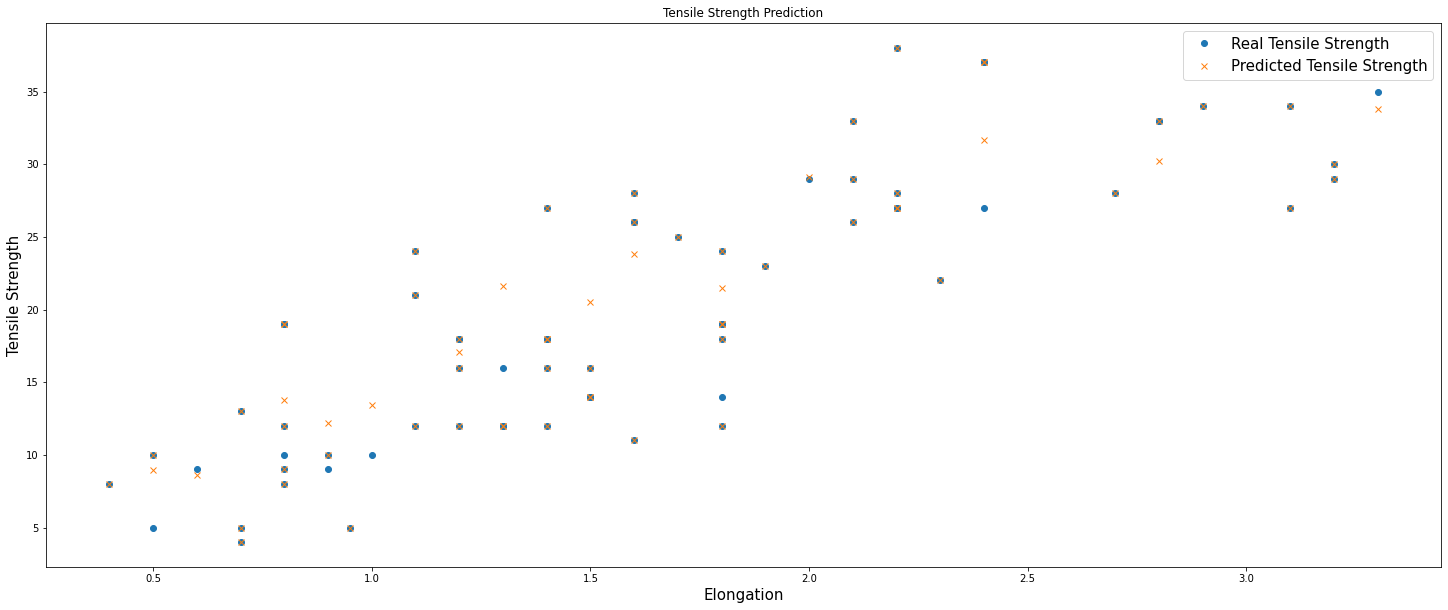

In [31]:
y_predicted, y_actual = Models(XGBRegressor())
Graph_prediction(y_actual, y_predicted)

### Neural Network

		Error Table
Mean Absolute Error      :  5.335672896077165
Mean Squared  Error      :  34.48927464243367
Root Mean Squared  Error :  5.872756988198445
Accuracy on Training set :  0.7206950016659588
Accuracy on Testing set  :  0.621103198816378


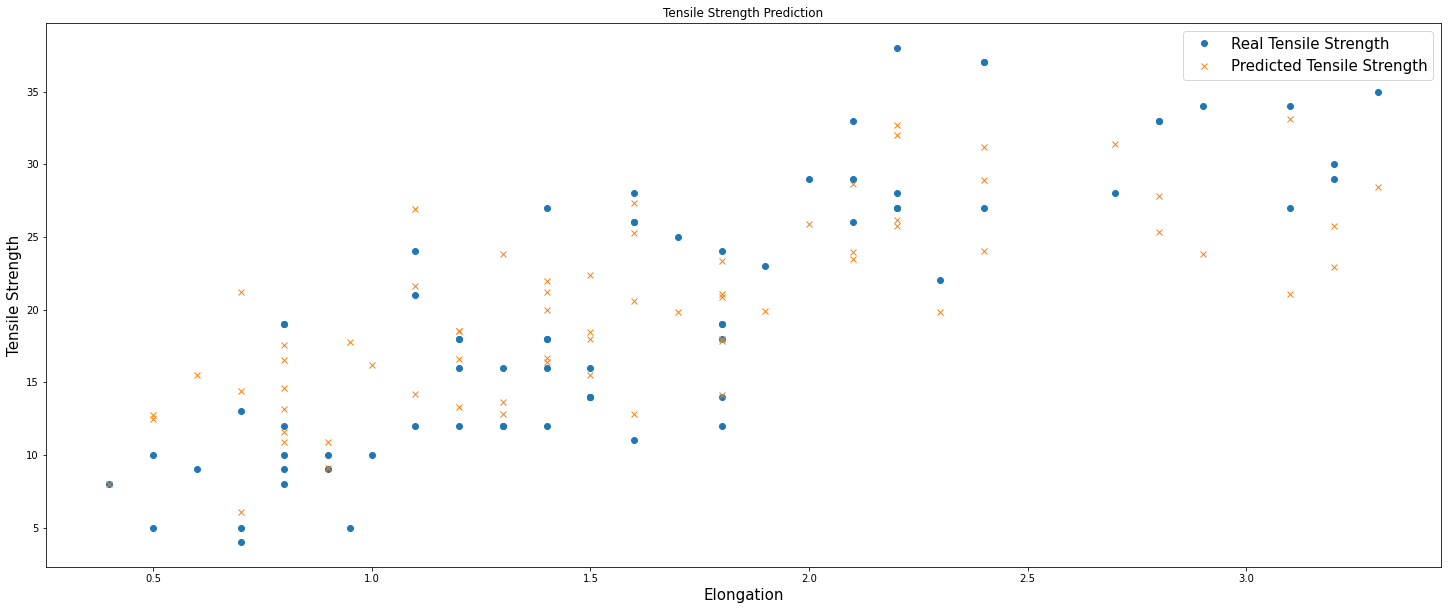

In [35]:
y_predicted, y_actual = Models(MLPRegressor())
Graph_prediction(y_actual, y_predicted)

### Random Forest

		Error Table
Mean Absolute Error      :  3.2342857142857144
Mean Squared  Error      :  17.41552857142857
Root Mean Squared  Error :  4.173191652851396
Accuracy on Training set :  0.9635867717010843
Accuracy on Testing set  :  0.8086741998766885


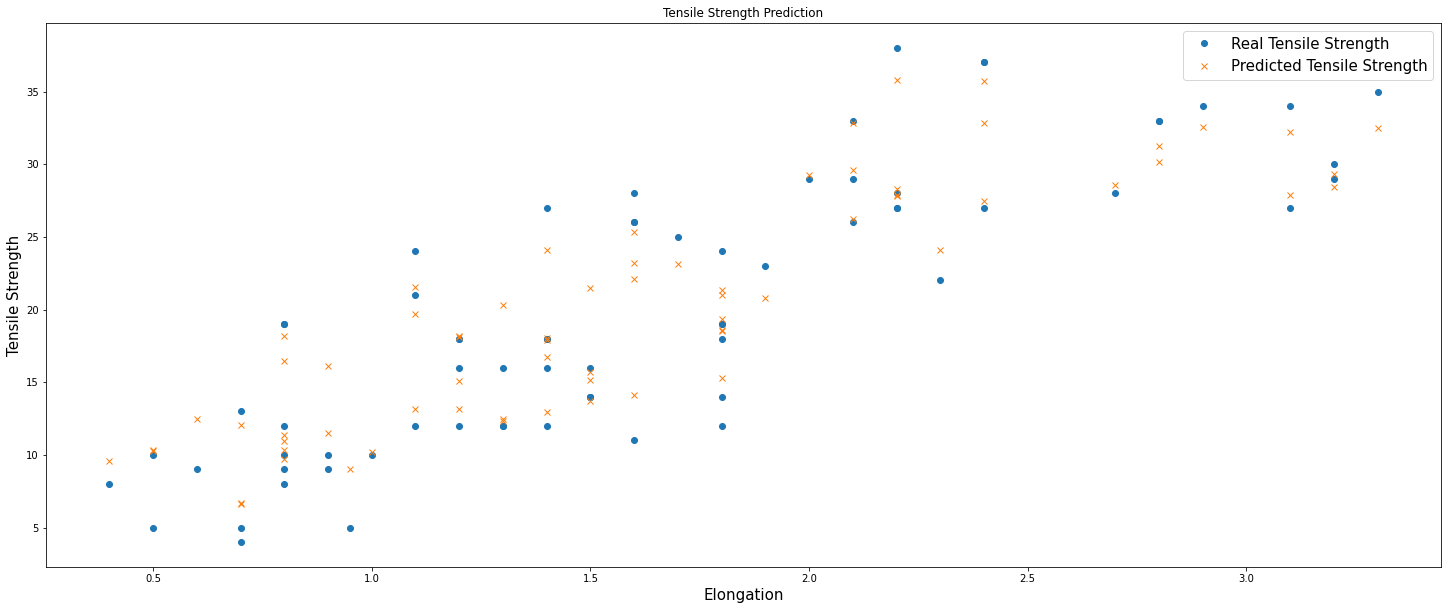

In [33]:
y_predicted, y_actual = Models(RandomForestRegressor())
Graph_prediction(y_actual, y_predicted)

## Regression predicting with Material
### XGBoost

In [23]:
def Definedata():
    data2 = df[ftrain]
    X = data2.drop(columns=['tension_strength']).values
    y = data2['tension_strength'].values
    return X, y


def Graph_prediction(y_actual, y_predicted):
    y = y_actual
    y_total = y_predicted
    number = len(df['material'])
    aa=[x for x in df['material']]
    plt.figure(figsize=(25,10)) 
    plt.plot(aa, y[:number], 'o', label='Actual Material')
    plt.plot(aa, y_total[:number], 'x', label='Predicted Material')
    
    plt.xlabel('Material', size=15)
    plt.ylabel('Tension_strength', size=15)
    plt.title('Material Prediction')
    plt.legend(fontsize=15)
    plt.show()

		Error Table
Mean Absolute Error      :  3.2964175769260953
Mean Squared  Error      :  15.570793852924583
Root Mean Squared  Error :  3.9459845226412864
Accuracy on Training set :  0.999999982016016
Accuracy on Testing set  :  0.8289403287274695


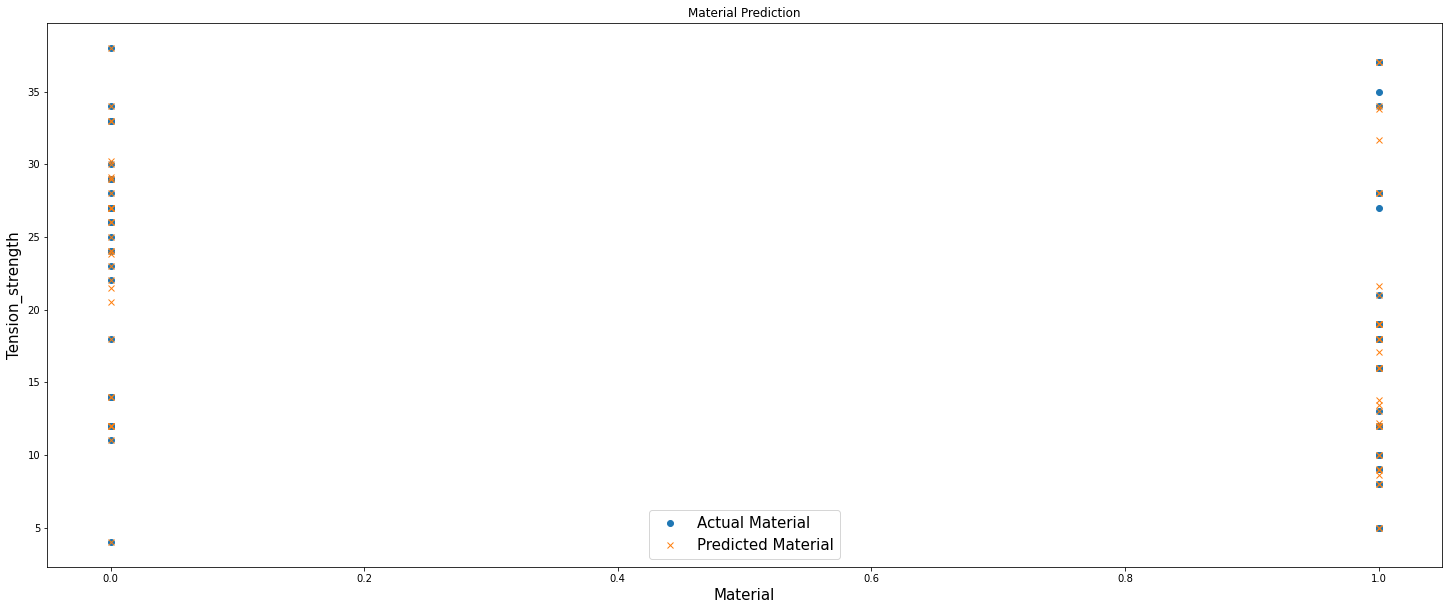

In [24]:
y_predicted, y_actual = Models(XGBRegressor())
Graph_prediction(y_actual, y_predicted)

### Neural Network

		Error Table
Mean Absolute Error      :  6.984427751349103
Mean Squared  Error      :  56.79391952500759
Root Mean Squared  Error :  7.5361740641394155
Accuracy on Training set :  0.5504656106961436
Accuracy on Testing set  :  0.376065902869711


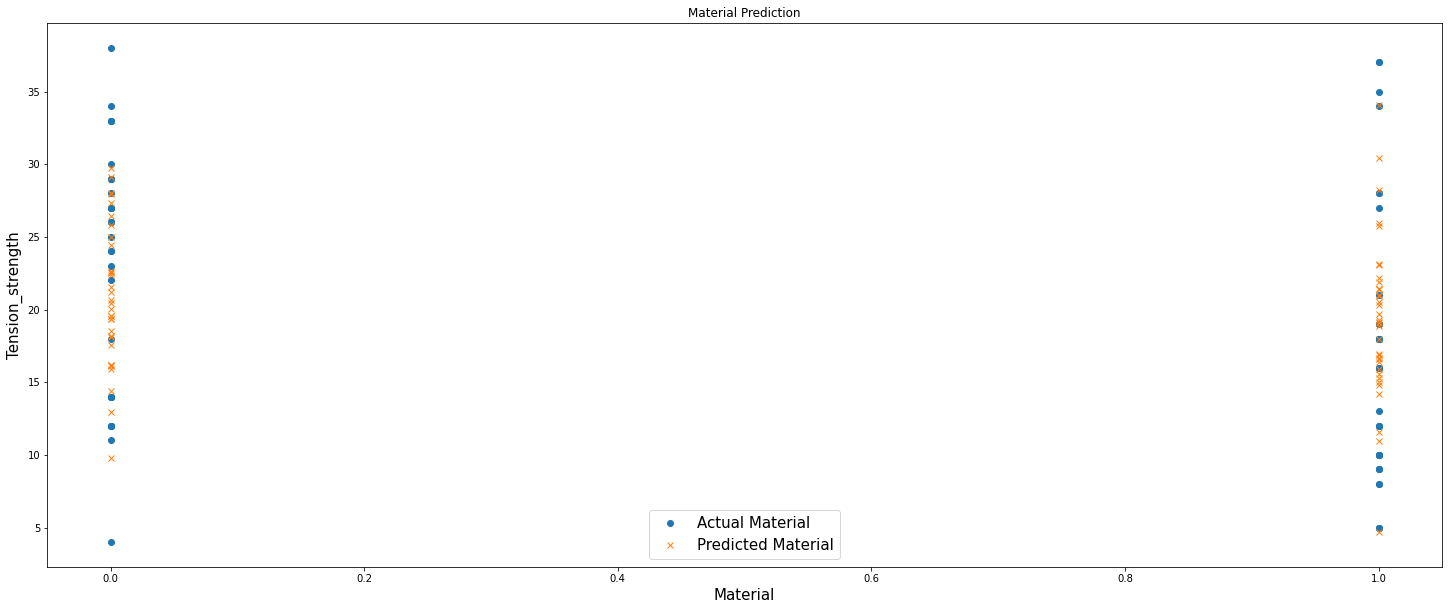

In [25]:
y_predicted, y_actual = Models(MLPRegressor())
Graph_prediction(y_actual, y_predicted)

### Random Forest

		Error Table
Mean Absolute Error      :  3.1485714285714286
Mean Squared  Error      :  16.31302857142857
Root Mean Squared  Error :  4.038939040320932
Accuracy on Training set :  0.9624897603681372
Accuracy on Testing set  :  0.8207861891149599


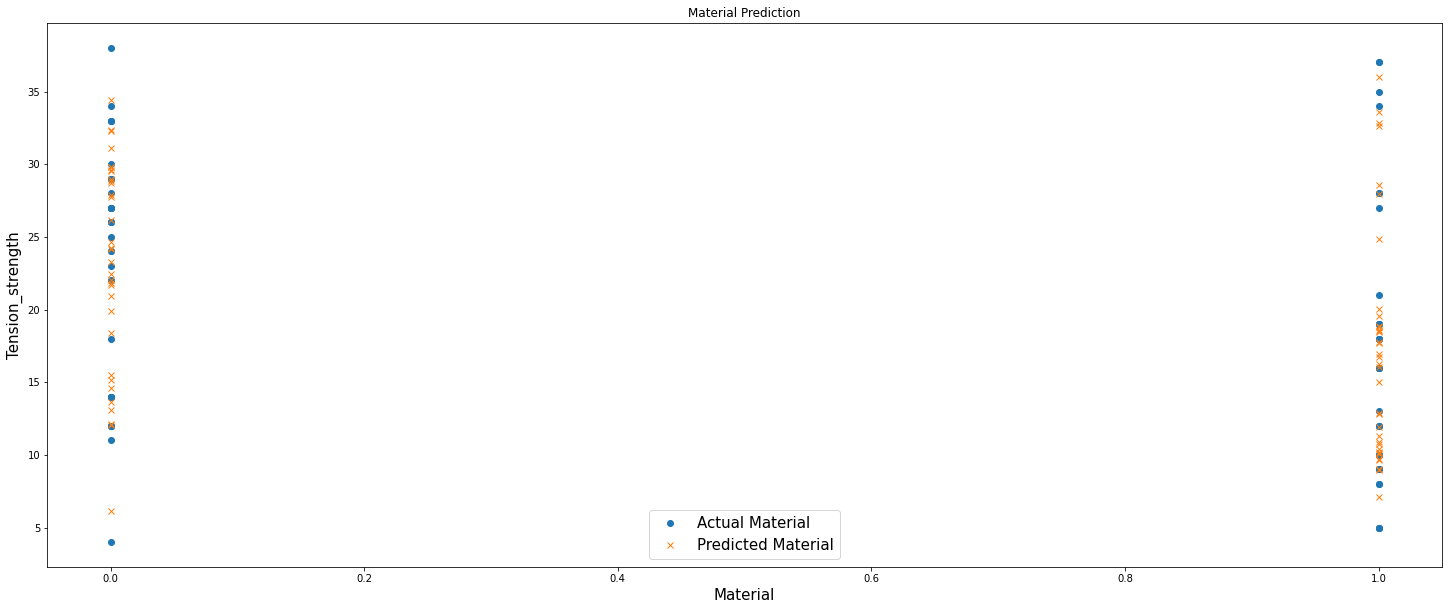

In [26]:
y_predicted, y_actual = Models(RandomForestRegressor())
Graph_prediction(y_actual, y_predicted)

### ABS

16.833333333333332
22.939393939393938
19.753623188405797
		Error Table
Mean Absolute Error      :  3.0625
Mean Squared  Error      :  13.03305
Root Mean Squared  Error :  3.6101315765495308
Accuracy on Training set :  0.9709836196629752
Accuracy on Testing set  :  0.5925182217879824


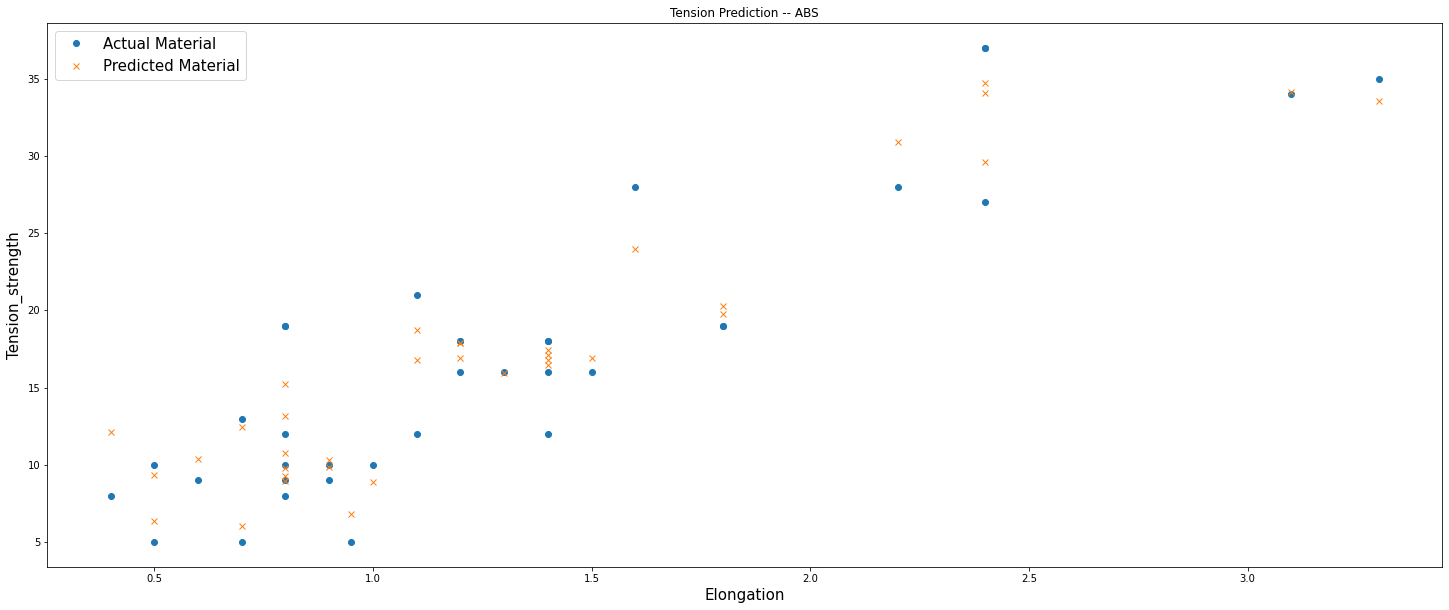

1.3627362736273627


In [41]:
s = 1
ABS = df[df['material'] >= s]
PLA = df[df['material'] < s]

ABS_mean = np.mean(ABS['tension_strength'])
PLA_mean = np.mean(PLA['tension_strength'])
overall_mean = np.mean(df['tension_strength'])

print(ABS_mean)
print(PLA_mean)
print(overall_mean)

def Definedata():
    data2 = ABS[ftrain]
    X = data2.drop(columns=['tension_strength']).values
    y = data2['tension_strength'].values
    return X, y

def Graph_prediction(y_actual, y_predicted):
    y = y_actual
    y_total = y_predicted
    number = len(ABS['elongation'])
    aa=[x for x in ABS['elongation']]
    plt.figure(figsize=(25,10)) 
    plt.plot(aa, y[:number], 'o', label='Actual Material')
    plt.plot(aa, y_total[:number], 'x', label='Predicted Material')
    
    plt.xlabel('Elongation', size=15)
    plt.ylabel('Tension_strength', size=15)
    plt.title('Tension Prediction -- ABS')
    plt.legend(fontsize=15)
    plt.show()
    
y_predicted, y_actual = Models(RandomForestRegressor())
Graph_prediction(y_actual, y_predicted)

### PLA

		Error Table
Mean Absolute Error      :  5.684285714285715
Mean Squared  Error      :  41.613614285714284
Root Mean Squared  Error :  6.450861515000479
Accuracy on Training set :  0.9298905075437716
Accuracy on Testing set  :  0.23515862715678926


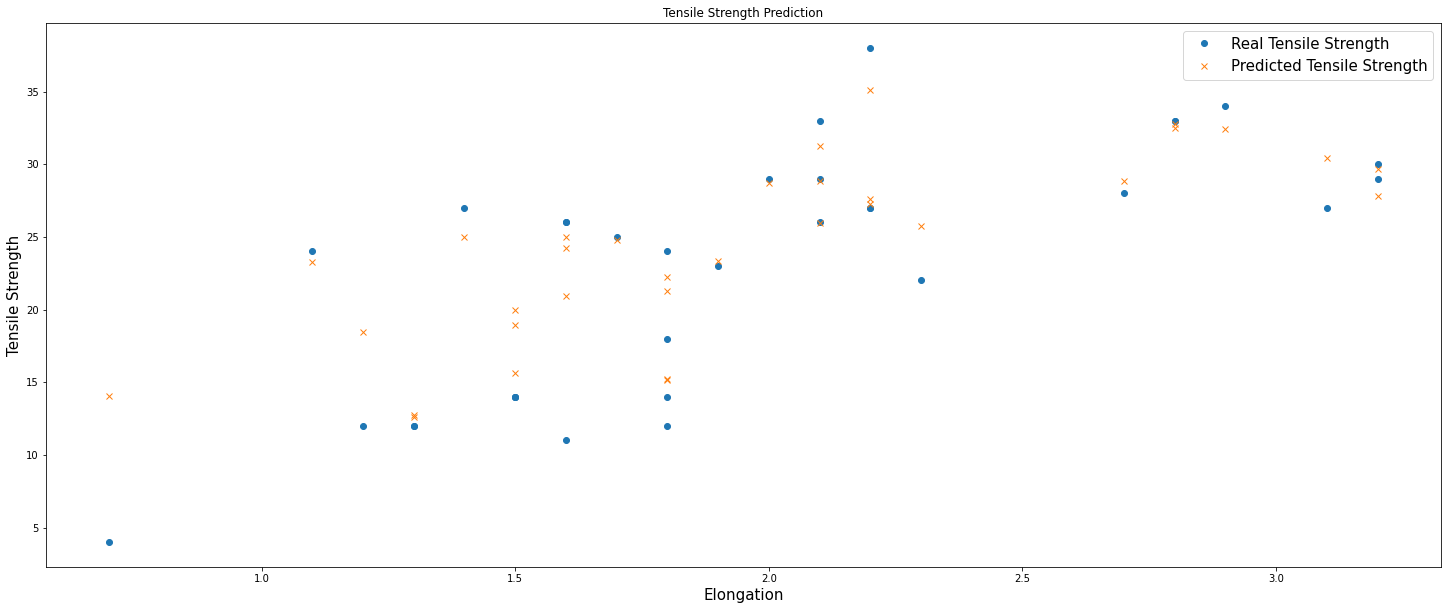

In [40]:
def Definedata():
    data2 = PLA[ftrain]
    X = data2.drop(columns=['tension_strength']).values
    y = data2['tension_strength'].values
    return X, y

def Graph_prediction(y_actual, y_predicted):
    y = y_actual
    y_total = y_predicted
    number = len(PLA['elongation'])
    aa=[x for x in PLA['elongation']]
    plt.figure(figsize=(25,10)) 
    plt.plot(aa, y[:number], 'o', label='Real Tensile Strength')
    plt.plot(aa, y_total[:number], 'x', label='Predicted Tensile Strength')
    
    plt.xlabel('Elongation', size=15)
    plt.ylabel('Tensile Strength', size=15)
    plt.title('Tensile Strength Prediction')
    plt.legend(fontsize=15)
    plt.show()

y_predicted, y_actual = Models(RandomForestRegressor())
Graph_prediction(y_actual, y_predicted)